##### Copyright 2022 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

*Notes:*
* *If you see an error about `flatbuffers` incompatibility, it's fine to ignore it. MediaPipe requires a newer version of flatbuffers (v2), which is incompatible with the older version of Tensorflow (v2.9) currently preinstalled on Colab.*
* *If you install MediaPipe outside of Colab, you only need to run `pip install mediapipe`. It isn't necessary to explicitly install `flatbuffers`.*

In [46]:
!pip install -q sounddevice
!pip install -q -i https://test.pypi.org/simple/ mediapipe==0.9.3.2

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [47]:
!wget -q https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/hand_landmarker.task

## Visualization utilities

In [ ]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

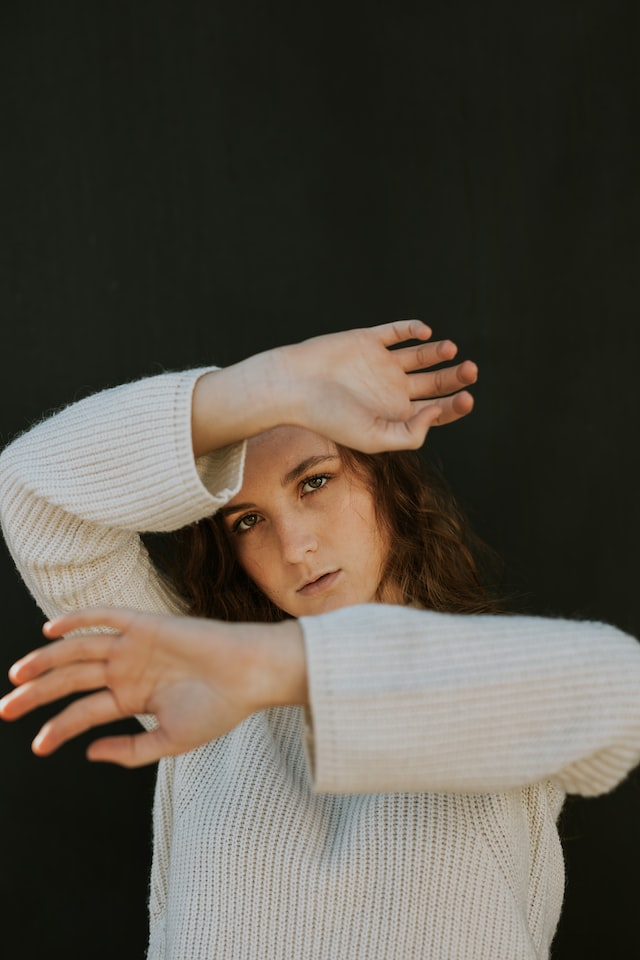

In [48]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [45]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)

if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

Saving 0-optimal.png to 0-optimal (1).png
Saving 1-optimal.png to 1-optimal (1).png
Saving 2-optimal.png to 2-optimal (1).png
Saving 3-optimal.png to 3-optimal (1).png
Saving 4-optimal.png to 4-optimal (1).png
Saving 5-optimal.png to 5-optimal (1).png
Saving 6-optimal.png to 6-optimal (1).png
Saving 7-optimal.png to 7-optimal (1).png
Saving 8-optimal.png to 8-optimal (1).png
Saving 9-optimal.png to 9-optimal (1).png
Saving a-optimal.png to a-optimal (1).png
Saving b-optimal.png to b-optimal (1).png
Saving bye-optimal.png to bye-optimal (1).png
Saving c-optimal.png to c-optimal (1).png
Saving d-optimal.png to d-optimal (1).png
Saving e-optimal.png to e-optimal (1).png
Saving good morning-optimal.png to good morning-optimal (1).png
Saving good-optimal.png to good-optimal (1).png
Saving hello-optimal.png to hello-optimal (1).png
Saving little bit-optimal.png to little bit-optimal (1).png
Saving no-optimal.png to no-optimal (1).png
Saving pardon-optimal.png to pardon-optimal (1).png
Saving

In [ ]:
# STEP 1: Import the necessary modules. https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/hand_landmarker/python/hand_landmarker.ipynb#scrollTo=etBjSdwImQPw
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os

im_list = {'a-video12image19.png': 'a-optimal.png'}
for image_name, best_im in im_list.items():
    print(image_name)
    # STEP 2: Create an HandLandmarker object.
    base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
    options = vision.HandLandmarkerOptions(base_options=base_options,
                                        num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(image_name)
    best_image = mp.Image.create_from_file(best_im)

    # STEP 4: Detect hand landmarks from the input image.
    detection_result = detector.detect(best_image)

    # STEP 5: Process the classification result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    result = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    cv2_imshow(result)
    write_dir = "best-landmarked-"+image_name
    print("Stored to", write_dir, cv2.imwrite(write_dir, result), '\n\n\n')

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


0-optimal.png


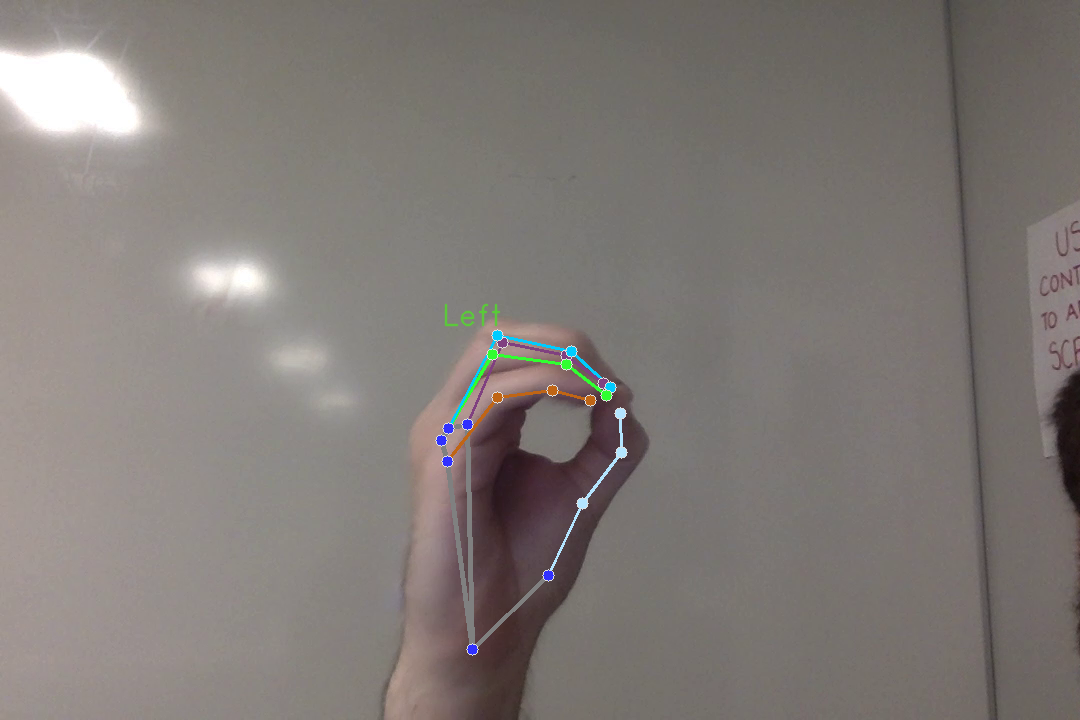

Stored to best-landmarked-0-optimal.png True 



1-optimal.png


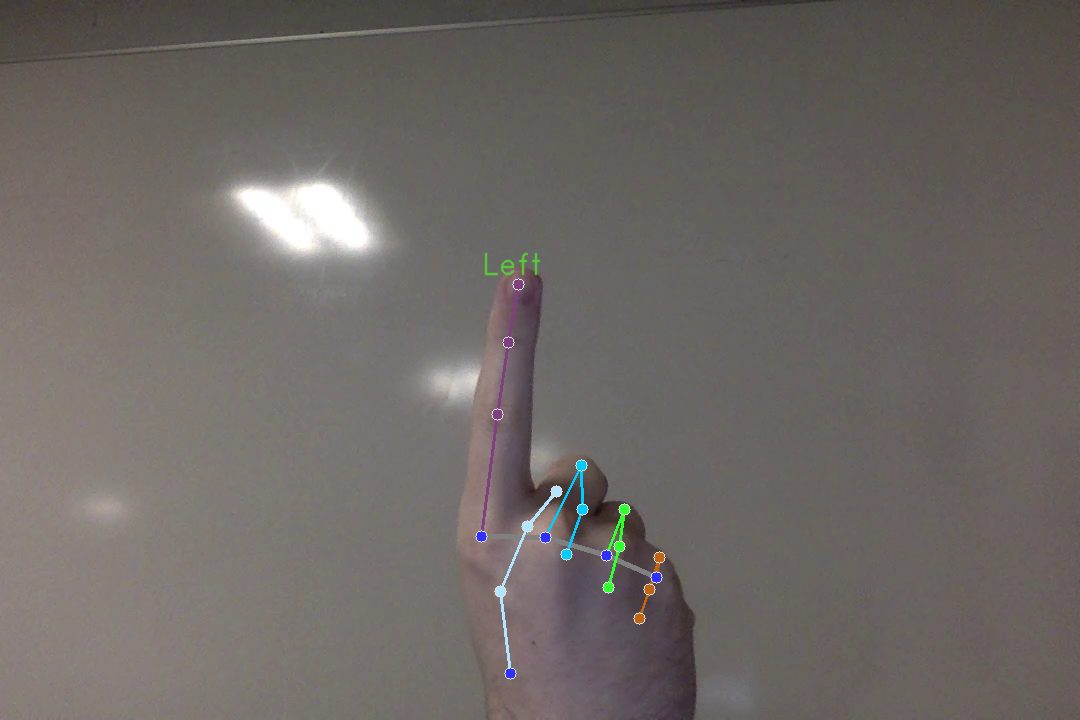

Stored to best-landmarked-1-optimal.png True 



2-optimal.png


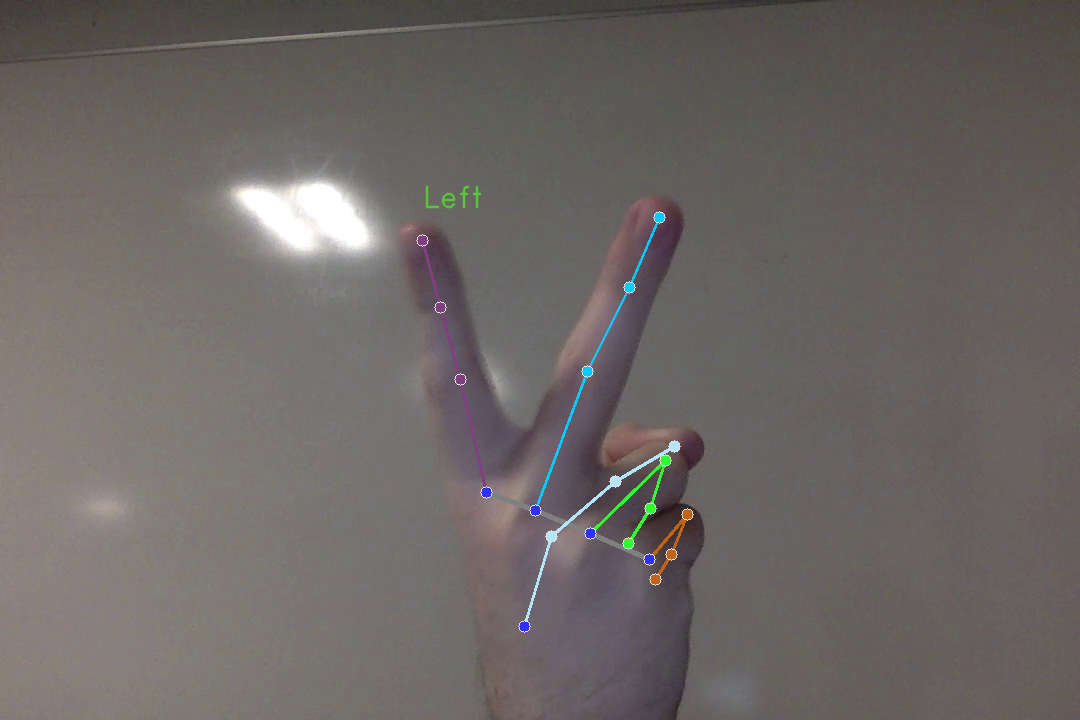

Stored to best-landmarked-2-optimal.png True 



3-optimal.png


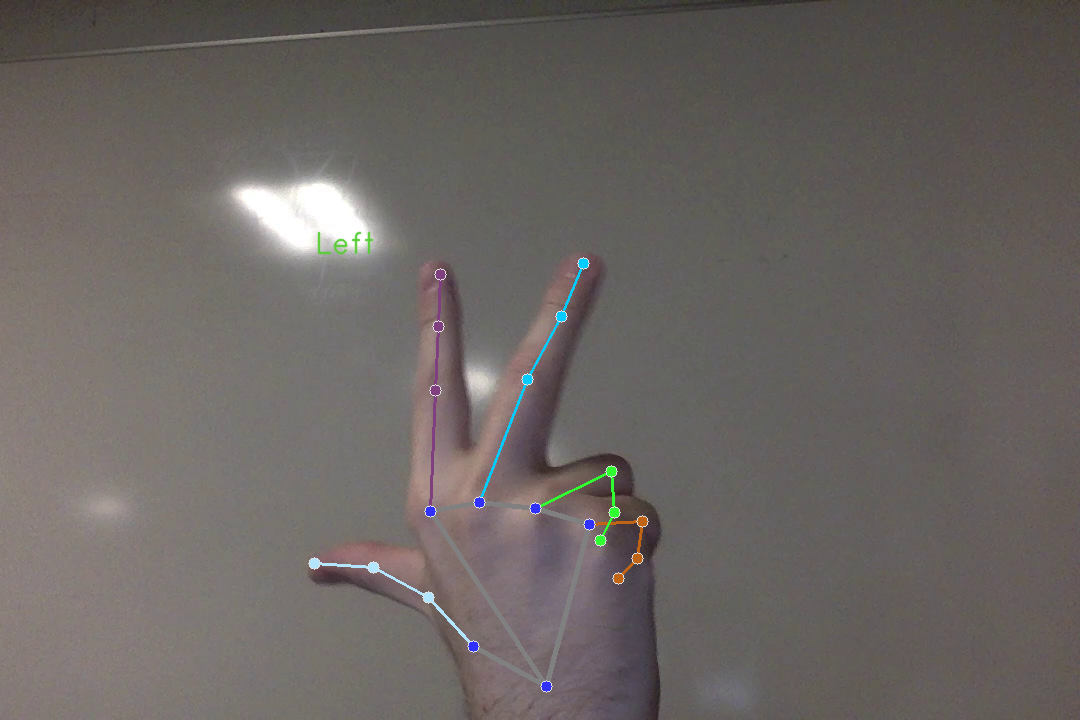

Stored to best-landmarked-3-optimal.png True 



4-optimal.png


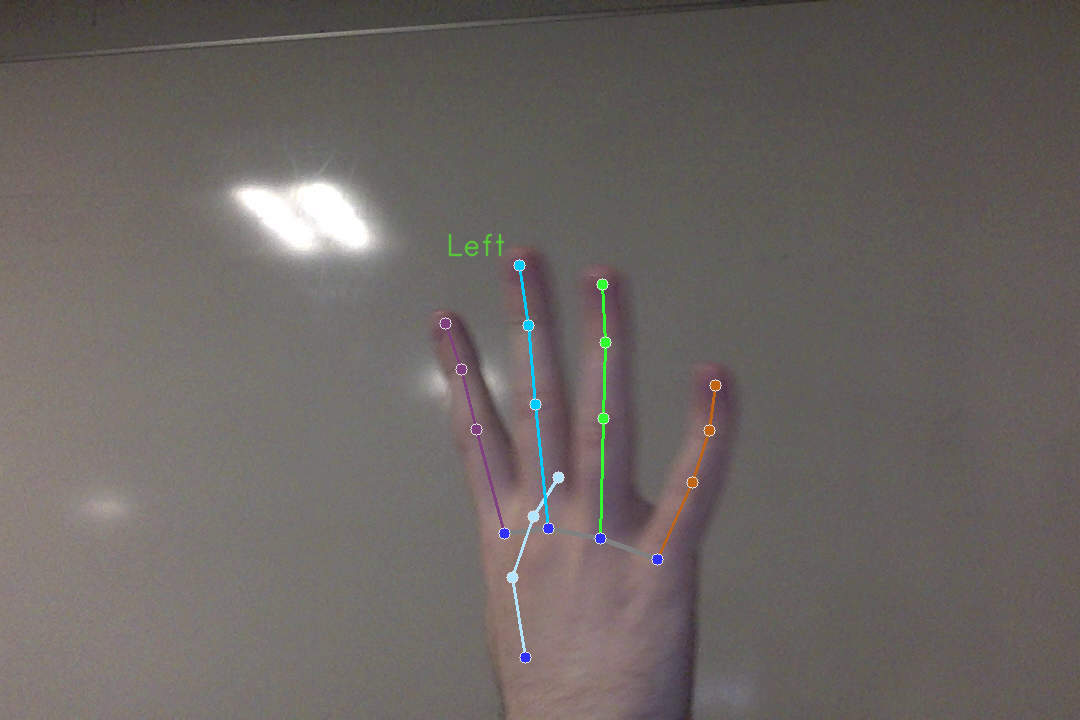

Stored to best-landmarked-4-optimal.png True 



5-optimal.png


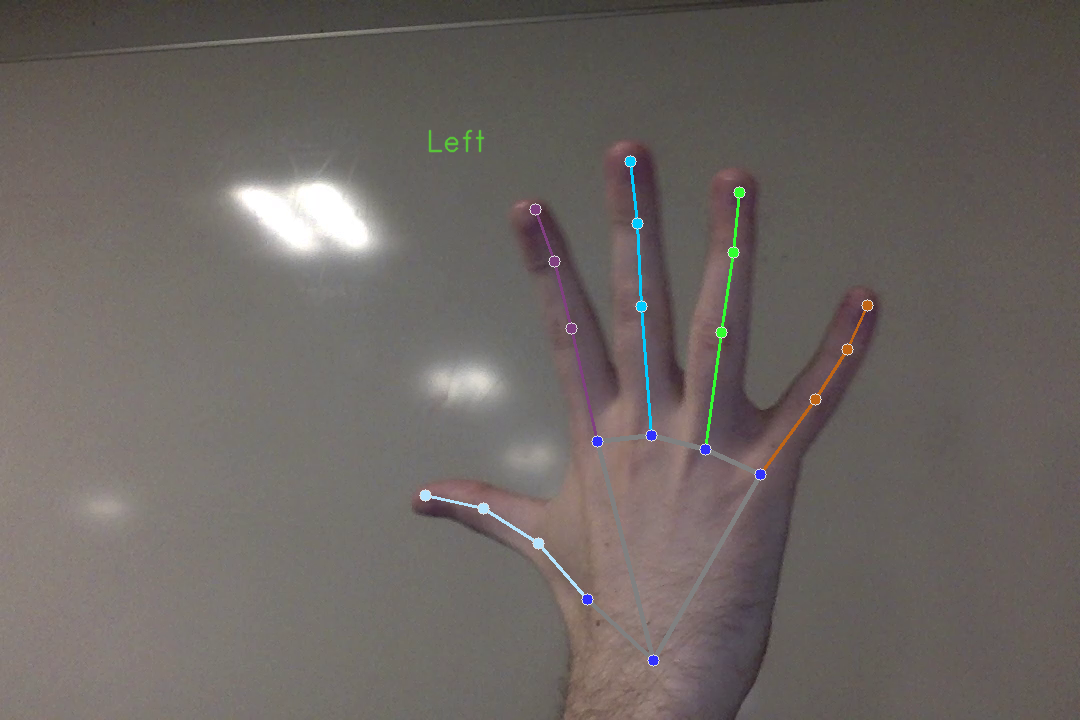

Stored to best-landmarked-5-optimal.png True 



6-optimal.png


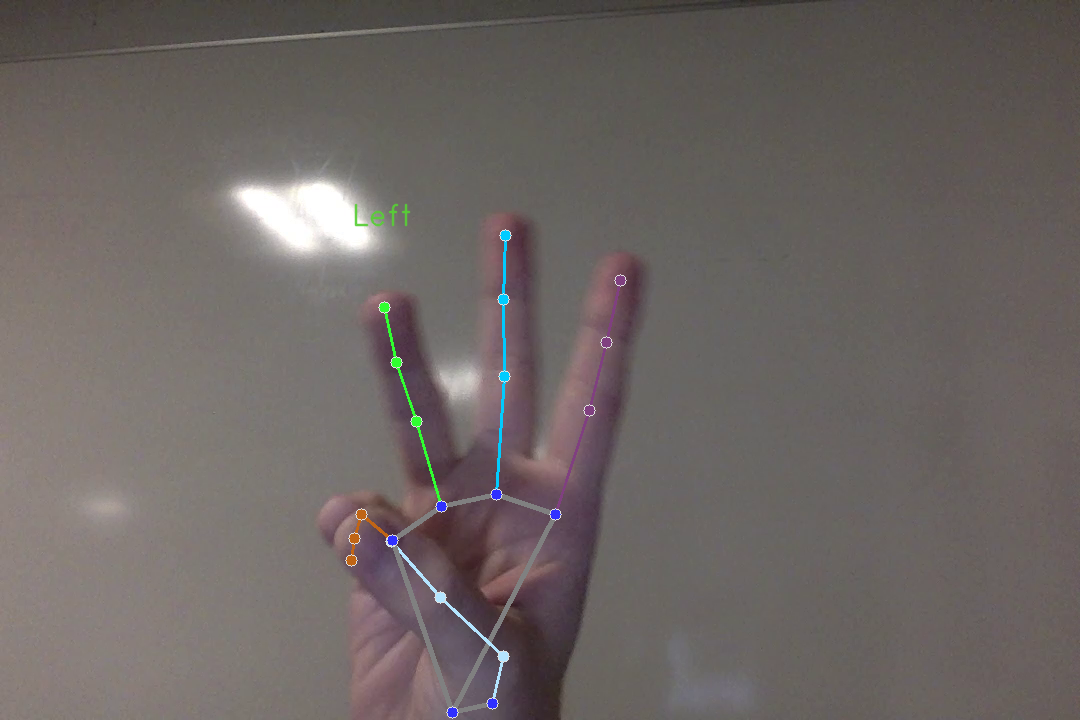

Stored to best-landmarked-6-optimal.png True 



7-optimal.png


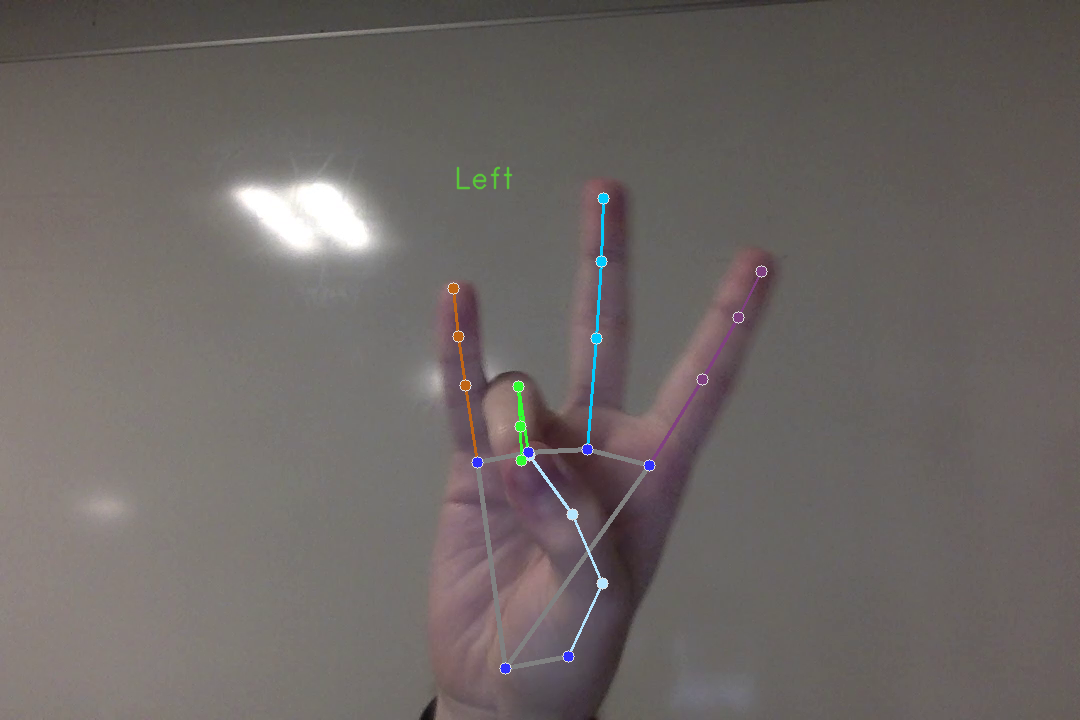

Stored to best-landmarked-7-optimal.png True 



8-optimal.png


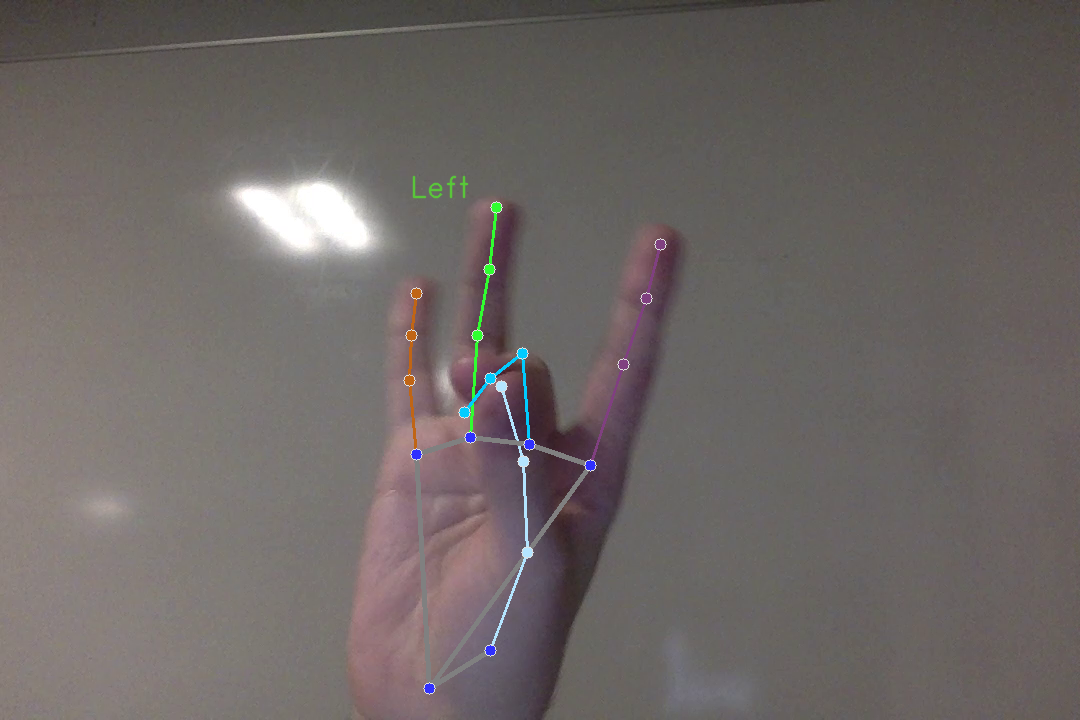

Stored to best-landmarked-8-optimal.png True 



9-optimal.png


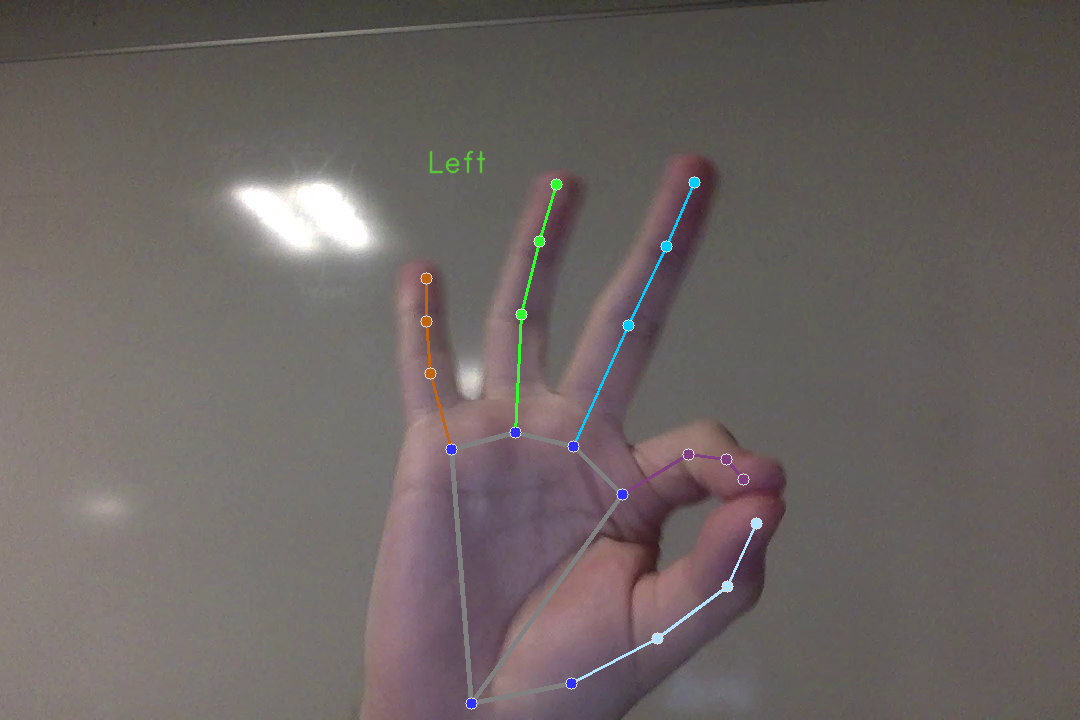

Stored to best-landmarked-9-optimal.png True 



a-optimal.png


KeyboardInterrupt: ignored

In [49]:
# STEP 1: Import the necessary modules. https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/hand_landmarker/python/hand_landmarker.ipynb#scrollTo=etBjSdwImQPw
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import os

im_list = ["0-optimal.png","1-optimal.png","2-optimal.png","3-optimal.png","4-optimal.png","5-optimal.png","6-optimal.png","7-optimal.png","8-optimal.png","9-optimal.png","a-optimal.png","b-optimal.png","c-optimal.png","d-optimal.png","e-optimal.png","bye-optimal.png","good-optimal.png","good morning-optimal.png","hello-optimal.png","little bit-optimal.png","no-optimal.png","pardon-optimal.png","please-optimal.png","project-optimal.png","whats up-optimal.png","yes-optimal.png"]
for image_name in im_list:
    print(image_name)
    # STEP 2: Create an HandLandmarker object.
    base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
    options = vision.HandLandmarkerOptions(base_options=base_options,
                                        num_hands=2)
    detector = vision.HandLandmarker.create_from_options(options)

    # STEP 3: Load the input image.
    image = mp.Image.create_from_file(image_name)

    # STEP 4: Detect hand landmarks from the input image.
    detection_result = detector.detect(image)

    # STEP 5: Process the classification result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
    result = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
    cv2_imshow(result)
    write_dir = "best-landmarked-"+image_name
    print("Stored to", write_dir, cv2.imwrite(write_dir, result), '\n\n\n')